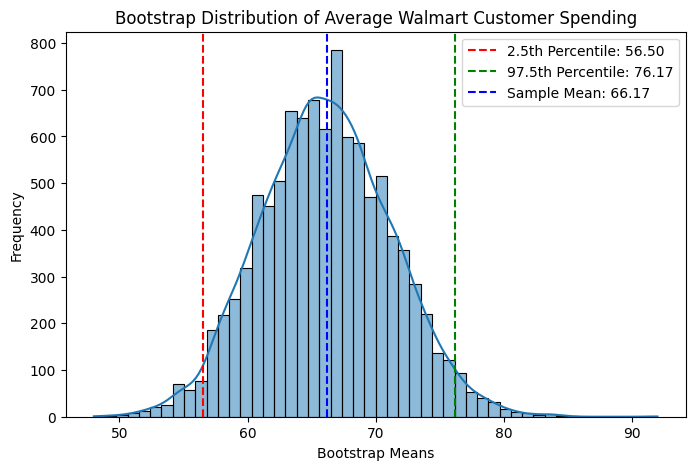

        Statistic      Value
0     Sample Mean  66.166667
1  Bootstrap Mean  66.123900
2    95% CI Lower  56.500000
3    95% CI Upper  76.166667


In [5]:
# Step 1: Walmart's Sample Data (30 customers' spending amounts)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


walmart_spending = np.array([
    45, 50, 30, 80, 120, 60, 55, 40, 35, 75, 110, 25, 65, 85, 95,
    70, 100, 20, 125, 90, 55, 60, 45, 80, 50, 30, 40, 85, 95, 70
])

# Step 2: Bootstrap Resampling
B = 10000  # Number of bootstrap samples
bootstrap_means_walmart = np.array([
    np.mean(np.random.choice(walmart_spending, size=len(walmart_spending), replace=True))
    for _ in range(B)
])

# Step 3: Compute Confidence Interval (95%)
ci_lower_walmart = np.percentile(bootstrap_means_walmart, 2.5)
ci_upper_walmart = np.percentile(bootstrap_means_walmart, 97.5)

# Step 4: Plot Bootstrap Distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means_walmart, bins=50, kde=True)
plt.axvline(ci_lower_walmart, color='red', linestyle='dashed', label=f'2.5th Percentile: {ci_lower_walmart:.2f}')
plt.axvline(ci_upper_walmart, color='green', linestyle='dashed', label=f'97.5th Percentile: {ci_upper_walmart:.2f}')
plt.axvline(np.mean(walmart_spending), color='blue', linestyle='dashed', label=f'Sample Mean: {np.mean(walmart_spending):.2f}')
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Average Walmart Customer Spending")
plt.legend()
plt.show()

# Step 5: Display Results
results_walmart_df = pd.DataFrame({
    "Statistic": ["Sample Mean", "Bootstrap Mean", "95% CI Lower", "95% CI Upper"],
    "Value": [np.mean(walmart_spending), np.mean(bootstrap_means_walmart), ci_lower_walmart, ci_upper_walmart]
})

print(results_walmart_df)
